In [1]:
import pandas as pd
from math import ceil
import numpy as np
import pydot as pt
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [160]:
data = pd.read_csv("train.csv", sep = ',', dtype = 'a')

columns = data.iloc[0].values

data.columns = columns
data = data.drop(0, axis = 0)
#data = data.drop(0, axis = 1)
#data = data.set_index('ID_code')

In [161]:
data

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
1,train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.691,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
2,train_1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.356,1.9518
3,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
4,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.925,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
5,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
6,train_5,0,11.4763,-2.3182,12.608,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.767,12.5809,-4.7602
7,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.783,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
8,train_7,0,13.558,-7.9881,13.8776,7.5985,8.6543,0.831,5.689,22.3262,...,13.17,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
9,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.163,4.4514,10.1854,...,1.4298,14.751,1.6395,1.4181,14.837,-1.994,-1.0733,8.1975,19.5114,4.8453
10,train_9,0,12.5088,1.9743,8.896,5.4508,13.6043,-16.2859,6.0637,16.841,...,0.5543,6.316,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [164]:
# Drop ID, there is no use for it
data = data.drop('ID_code', axis = 1)

In [165]:
#datan = data.convert_objects(convert_numeric=True)
df = data.apply(pd.to_numeric)

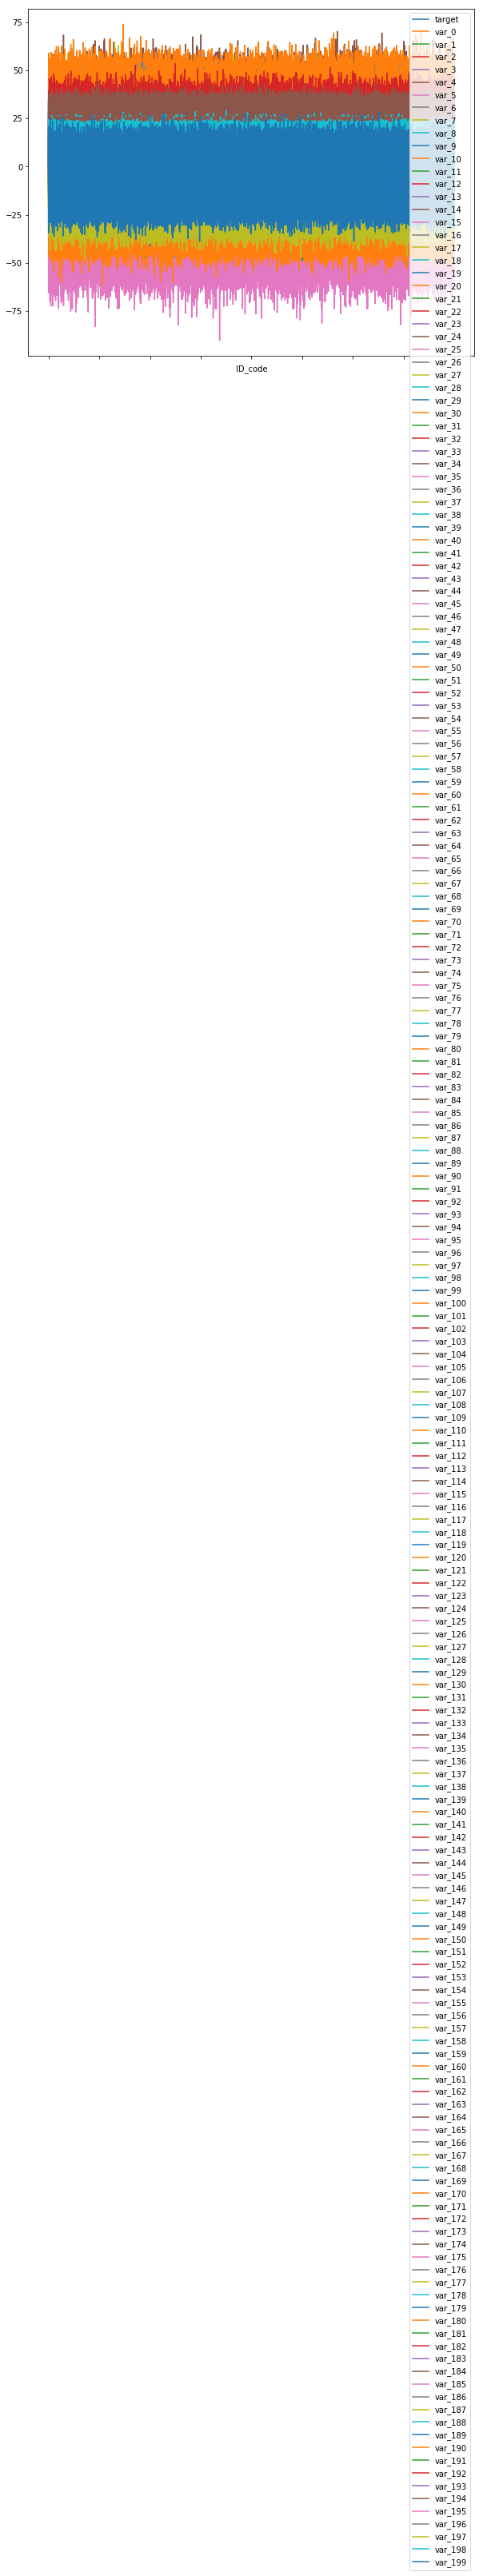

In [98]:
df.plot(figsize = (10,8));

In [166]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [167]:
df.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [169]:
X_train, X_test, y_train, y_test = train_test_split(df[columns[2:]], df.target, test_size=0.1, random_state=1234)

In [170]:
print(X_train.shape, X_test.shape)

(180000, 200) (20000, 200)


In [175]:
random_idx = np.random.choice(len(X_train), len(X_train), replace=False)

X_train = X_train.iloc[random_idx]
y_train = y_train.iloc[random_idx]

In [176]:
classifier = RandomForestClassifier(n_estimators=250,
                                    n_jobs=1, class_weight='balanced').fit(X_train, y_train)
y_predicted_tree = classifier.predict(X_test)

In [177]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted_tree))

             precision    recall  f1-score   support

          0       0.90      1.00      0.95     17956
          1       0.00      0.00      0.00      2044

avg / total       0.81      0.90      0.85     20000



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


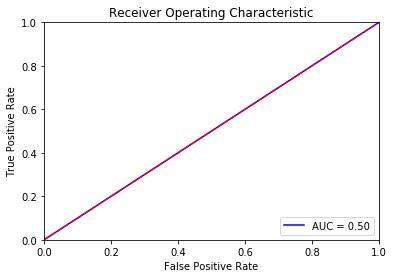

In [178]:
fpr, tpr, threshold = roc_curve(y_test, y_predicted_tree)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [246]:
from keras.utils.data_utils import get_file
from keras.layers.embeddings import Embedding
from keras.layers.core import Dense, Dropout, RepeatVector, Lambda, Permute, Activation, Masking, Reshape
from keras.layers import recurrent, Input, TimeDistributed, add, concatenate, Multiply, Bidirectional
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.models import Sequential, Model
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint, Callback, LearningRateScheduler
from keras.optimizers import SGD, Adam
from keras.layers.normalization import BatchNormalization

from keras.activations import softmax
from keras.metrics import categorical_accuracy
import keras.backend as K
from keras.regularizers import l2
from keras import initializers
#from keras.utils.visualize_util import plot
from keras.layers.core import Layer

from keras.activations import softmax, tanh, sigmoid, hard_sigmoid, relu

In [265]:
def create_models(in_shape):
    adam = Adam(lr = 0.0003)  # Best learning found in previous exp
    input_layer = Input(shape = (in_shape,), name = 'input_layer')
    dense = Dense(100, activation = 'relu')(input_layer)
    #dense = Dropout(0.35)(dense)
    dense = Dense(50, activation = 'relu')(dense)
    dense = Dropout(0.30)(dense)
    output = Dense(2, activation = 'softmax')(dense)
    model = Model(inputs = input_layer, outputs = output)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    #model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    #tf_thetas = tf.get_variable("tf_thetas",
    #                        initializer=thetas)

    #sample_output = Lambda(lambda x: 
    #               gumbel_softmax(x, temperature,  hard = hard_val), 
    #               output_shape = (2,))(output)
    #cond_prob = Lambda(lambda x: tf.einsum('ai,ij->aj', x[0], tf_thetas*1.),
    #          output_shape = (2, ))([sample_output])

    #model_ask = Model(inputs = input_layer, outputs = cond_prob)
    #model_ask.compile(loss = 'categorical_crossentropy', 
    #              optimizer = adam, metrics = ['accuracy'])
    
    return model#, model_ask

In [266]:
K.clear_session()
model = create_models(X_train.shape[1])

In [267]:
from keras.utils import to_categorical
y_binary_train = to_categorical(y_train)
y_binary_test = to_categorical(y_test)

In [268]:
h = model.fit(X_train, y_binary_train, 
              epochs = 50, validation_data = (X_test, y_binary_test),
              batch_size = 25,
              verbose = 1)

Train on 180000 samples, validate on 20000 samples
Epoch 1/50
180000/180000 [==============================] - 28s 157us/step - loss: 0.2883 - acc: 0.9012 - val_loss: 0.2537 - val_acc: 0.9080
Epoch 2/50
180000/180000 [==============================] - 23s 127us/step - loss: 0.2600 - acc: 0.9063 - val_loss: 0.2500 - val_acc: 0.9052
Epoch 3/50
180000/180000 [==============================] - 22s 122us/step - loss: 0.2554 - acc: 0.9070 - val_loss: 0.2605 - val_acc: 0.9075
Epoch 4/50
 19975/180000 [==>...........................] - ETA: 27s - loss: 0.2564 - acc: 0.9066

KeyboardInterrupt: 

In [ ]:
y_predicted_nn = model.predict(X_test)

In [ ]:
temp_nn_predic = []
for i in range(len(y_predicted_nn)):
    if y_predicted_nn[i,0] > y_predicted_nn[i,1]:
        temp_nn_predic.append(0)
    else:
        temp_nn_predic.append(1)

In [ ]:
# There is no gain with more layers!
fpr_nn, tpr_nn, threshold_nn = roc_curve(y_test, temp_nn_predic)
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_nn, tpr_nn, 'b', label = 'AUC = %0.2f' % roc_auc_nn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [68]:
datat = pd.read_csv("test.csv", sep = ',', dtype = 'a')

In [70]:
datat = datat.set_index('ID_code')

In [71]:
datat

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.81,...,-2.1556,11.8495,-1.43,2.4508,13.7112,2.4669,4.3654,10.72,15.4722,-8.7197
test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.976
test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.895,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.18,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
test_3,8.5374,-1.3222,12.022,6.5749,8.8458,3.1744,4.9397,20.566,3.3755,7.4578,...,9.5702,9.0766,1.658,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.989,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.286,-5.1612,7.2882,13.926,-9.1846
test_5,5.9862,-2.2913,8.6058,7.0685,14.2465,-8.6761,4.2467,14.7632,1.879,7.2842,...,-2.1115,7.1178,-0.4249,8.8781,14.9438,-2.2151,-6.0233,9.8117,17.1127,10.824
test_6,8.4624,-6.1065,7.3603,8.2627,12.0104,-7.2073,4.167,13.0809,-4.3004,6.3181,...,12.3609,6.8661,4.0971,8.8484,17.501,0.0295,7.7443,9.1509,18.4736,5.1499
test_7,17.3035,-2.4212,13.3989,8.3998,11.0777,9.6449,5.9596,17.8477,-4.8068,7.4643,...,4.4676,4.4214,0.9303,1.4994,15.2648,-1.7931,6.5316,10.4855,23.4631,0.7283
test_8,6.9856,0.8402,13.7161,4.7749,8.6784,-13.7607,4.3386,14.5843,2.5883,7.2215,...,-3.4657,7.8754,2.4698,-0.0362,16.7144,0.1221,-1.4328,9.9207,16.9865,-3.3304


In [73]:
dft = datat.apply(pd.to_numeric)
dft.dtypes

var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
var_28     float64
var_29     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_190    float64
var_191    f

In [75]:
dft.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [76]:
y_test_pred = classifier.predict(dft)

In [100]:
from sklearn.metrics import roc_curve, auc

In [80]:
#dft.describe().to_excel("test_statistic.xlsx")

In [81]:
#df.describe().to_excel("train_statistic.xlsx")

In [112]:
# Get numerical feature importances
importances = list(classifier.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(columns[1:], importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: var_80               Importance: 0.02
Variable: target               Importance: 0.01
Variable: var_0                Importance: 0.01
Variable: var_1                Importance: 0.01
Variable: var_5                Importance: 0.01
Variable: var_8                Importance: 0.01
Variable: var_11               Importance: 0.01
Variable: var_12               Importance: 0.01
Variable: var_17               Importance: 0.01
Variable: var_20               Importance: 0.01
Variable: var_21               Importance: 0.01
Variable: var_25               Importance: 0.01
Variable: var_32               Importance: 0.01
Variable: var_33               Importance: 0.01
Variable: var_39               Importance: 0.01
Variable: var_43               Importance: 0.01
Variable: var_52               Importance: 0.01
Variable: var_66               Importance: 0.01
Variable: var_74               Importance: 0.01
Variable: var_75               Importance: 0.01
Variable: var_77               Importanc